Nama : Muhammad Mahdi <br/>
NIM  : 21/473808/PA/20431

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st
import numpy as np
import math

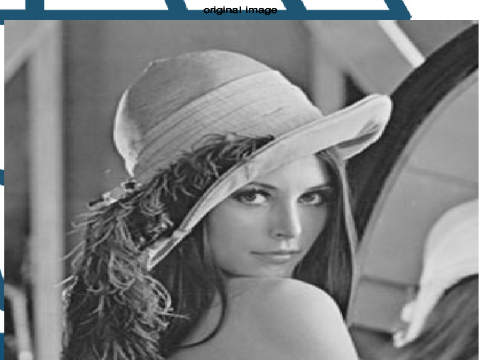

In [ ]:
h, w=360, 480
img1=cv.imread('/content/drive/MyDrive/Colab Notebooks/sharpening.png')
img1=cv.resize(img1,(w,h))

imgGrey = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1)


##K-Means Clustering

Gambar Awal


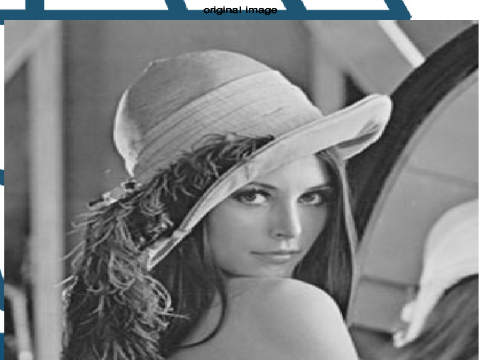

Gambar Setelah K-Means Clustering


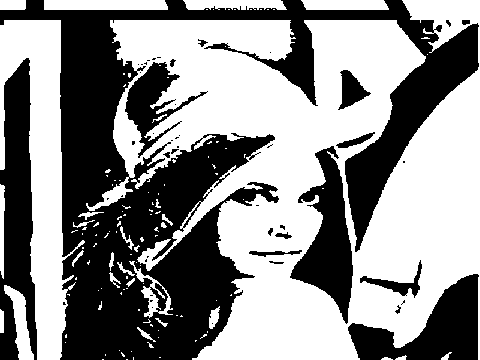

In [ ]:
imgKmean = img1.copy();

print('Gambar Awal')
cv2_imshow(imgKmean)

# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = imgKmean.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 2
#also random centres are initially choosed for k-means clustering
k = 2
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)

centers[0] = [255]
centers[1] = [0]

labels = labels.flatten()

segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape(imgKmean.shape)

print('Gambar Setelah K-Means Clustering')
cv2_imshow(segmented_image)

##Otsu Method Tresholding

Gambar Awal


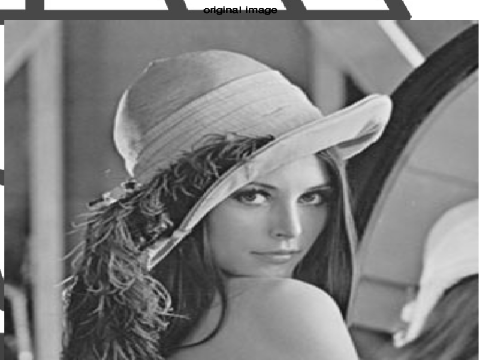

The Treshold Value Is : 122.021484375
Gmbar Dengan Otsu Method Tresholding


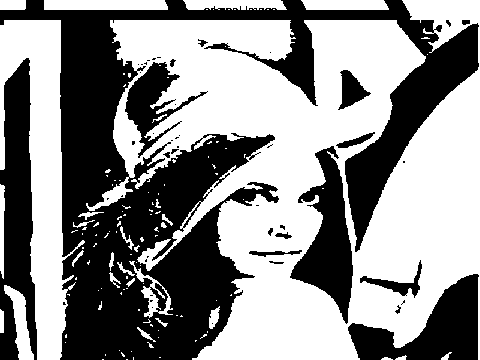

In [ ]:
imgOtsu = imgGrey.copy();
print('Gambar Awal')
cv2_imshow(imgOtsu)

# Set total number of bins in the histogram
bins_num = 256

# Get the image histogram
hist, bin_edges = np.histogram(imgOtsu, bins=bins_num)

# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

print('The Treshold Value Is :', threshold)

for i in range(imgOtsu.shape[0]):
  for j in range(imgOtsu.shape[1]):
    if imgOtsu[i][j] >= threshold:
      imgOtsu[i][j] = 255
    else:
      imgOtsu[i][j] = 0

print('Gmbar Dengan Otsu Method Tresholding')
cv2_imshow(imgOtsu)

##Morphological Processing


###Applying Dilation

Gambar Awal


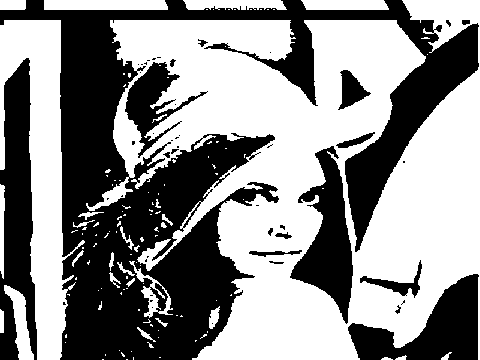

Gambar Setelah Dilatasi


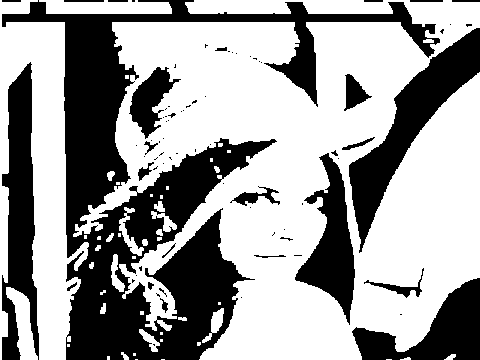

In [ ]:
#Show the image
print('Gambar Awal')
cv2_imshow(imgOtsu)

# Dilation Function
def dilation(img, kernel):
  output = np.zeros(img.shape)
  pad = np.pad(img, pad_width=1, mode='constant', constant_values=0)
  p = img.shape[0]
  q = img.shape[1]
  r = kernel.shape[0]
  s = kernel.shape[0]

  for i in range(p):
    for j in range(q):
      Berubah = False
      for k in range(r):
        for l in range(s):
          if(kernel[k][l]==255 and pad[i-k-1][j-l-1] == kernel[k][l]):
            output[i][j] = 255
            Berubah = True
            break
        if(Berubah): break
  return output

kernel = np.full(shape=(3, 3), fill_value=255)
dilated_image = dilation(imgOtsu, kernel)
print('Gambar Setelah Dilatasi')
cv2_imshow(dilated_image)

###Applying Erosion

Gambar Awal


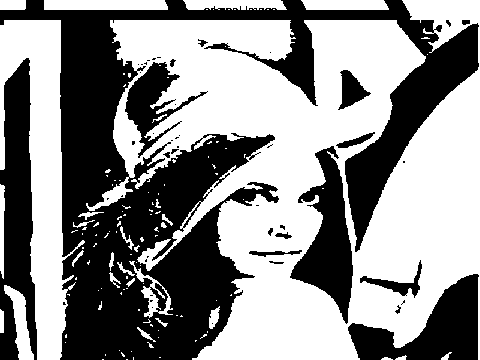

Gambar Setelah Erosi


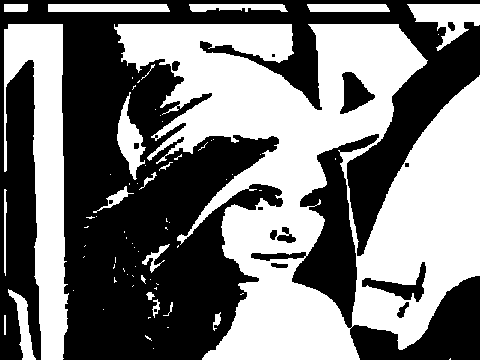

In [ ]:
#Show the image
print('Gambar Awal')
cv2_imshow(imgOtsu)

# Erotion Function
def erosion(img, kernel):
  output = np.zeros(img.shape)
  pad = np.pad(img, pad_width=1, mode='constant', constant_values=0)
  p = img.shape[0]
  q = img.shape[1]
  r = kernel.shape[0]
  s = kernel.shape[0]

  for i in range(p):
    for j in range(q):
      Sama = True
      for k in range(r):
        for l in range(s):
          if(kernel[k][l]==255 and pad[i-k-1][j-l-1] != kernel[k][l]):
            Sama = False
      if(Sama):
        output[i][j] = 255

  return output

kernel = np.full(shape=(3, 3), fill_value=255)
ersoion_image = erosion(imgOtsu, kernel)
print('Gambar Setelah Erosi')
cv2_imshow(ersoion_image)

###Opening And Closing

Gambar Setelah Opening


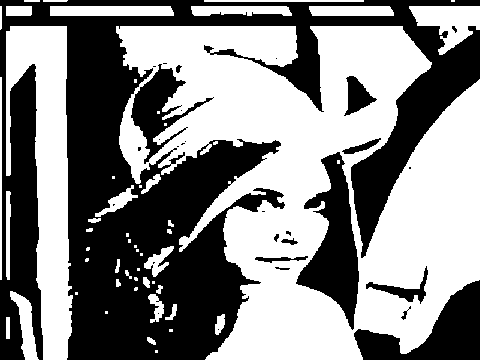

Gambar Setelah Closing


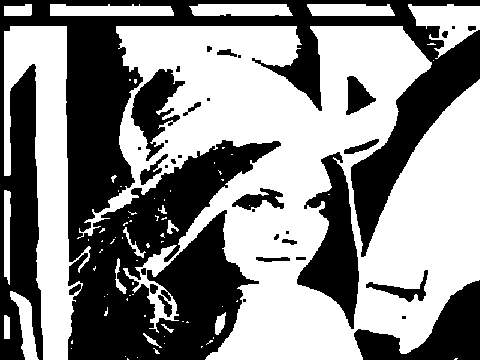

In [ ]:
kernel = np.full(shape=(3, 3), fill_value=255)

def opening(img, kernel) :
  return dilation(erosion(img, kernel), kernel)

def closing(img, kernel) :
  return erosion(dilation(img, kernel), kernel)

print('Gambar Setelah Opening')
img_opening = opening(imgOtsu, kernel)
cv2_imshow(img_opening)

print('Gambar Setelah Closing')
img_closing = closing(imgOtsu, kernel)
cv2_imshow(img_closing)

##Demo Code

#####3x3 Square Kernel

Erosion


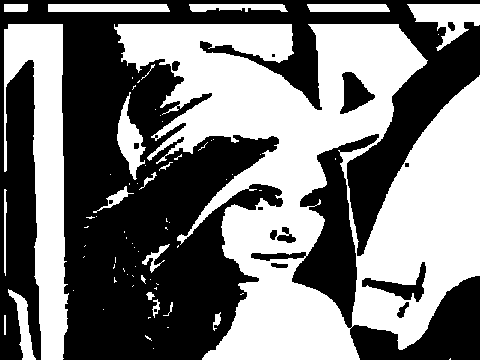

Dilatation


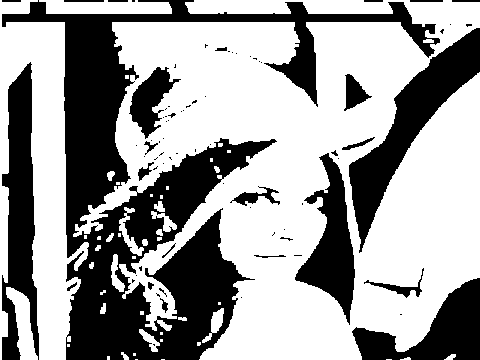

Opening


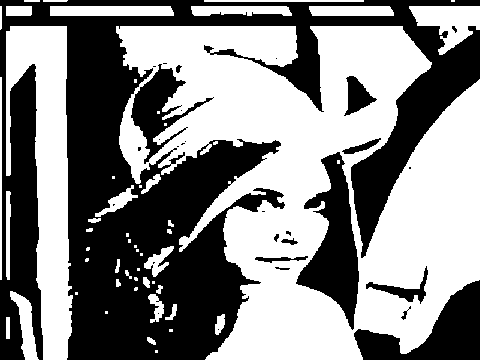

Closing


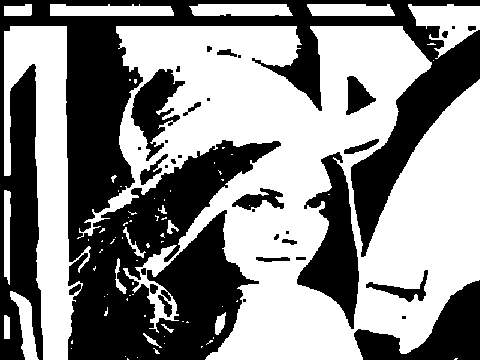

In [ ]:
kernel = np.full(shape=(3, 3), fill_value=255)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))

#####3x3 Cross Kernel

Erosion


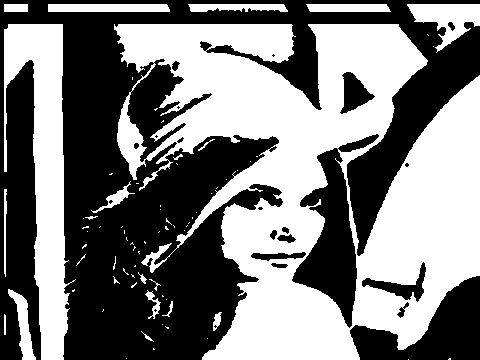

Dilatation


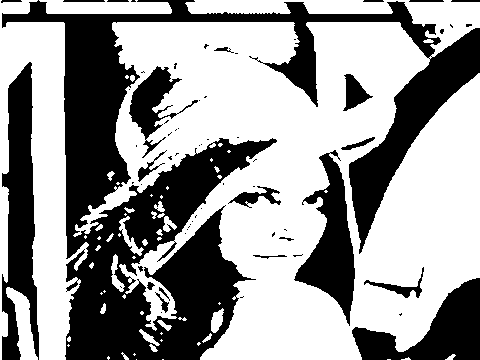

Opening


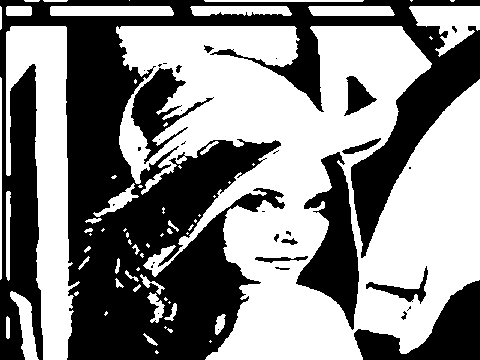

Closing


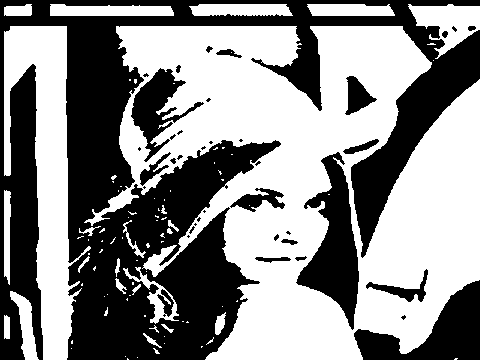

In [ ]:
kernel = np.array(
         [[0,255,0],
          [255,255,255],
          [0,255,0]]
)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))

#####3x3 Diagonal Kernel

Erosion


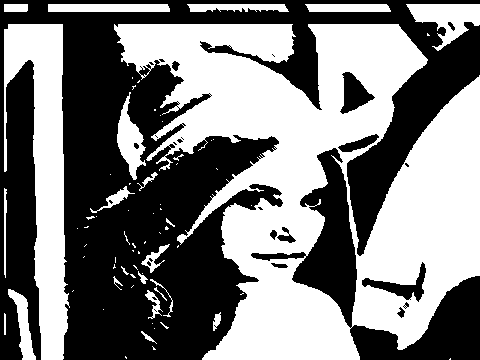

Dilatation


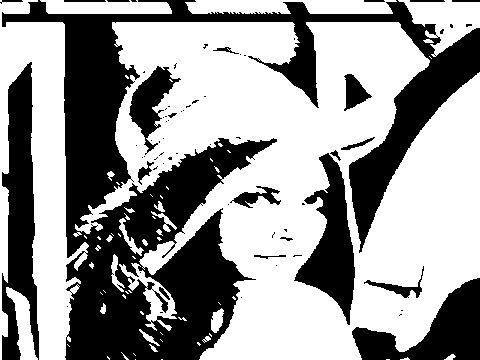

Opening


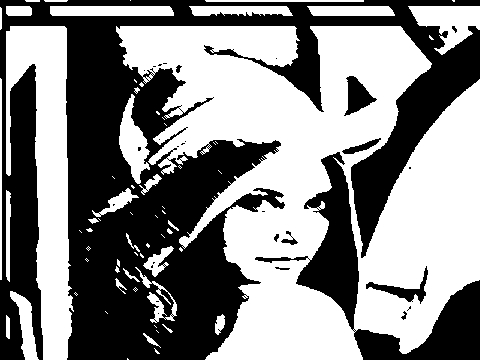

Closing


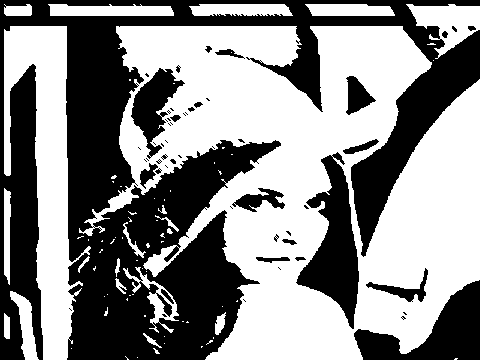

In [ ]:
kernel = np.array(
         [[255,0,0],
          [0,255,0],
          [0,0,255]]
)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))

#####3x3 X Kernel

Erosion


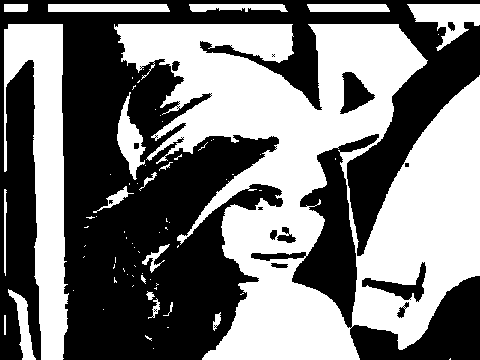

Dilatation


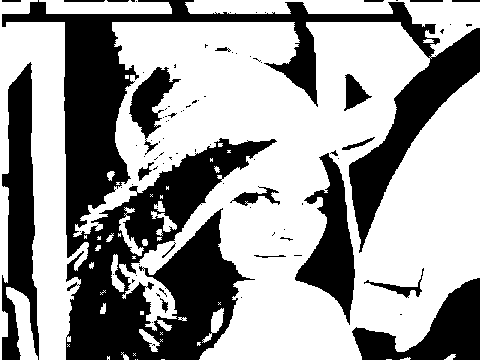

Opening


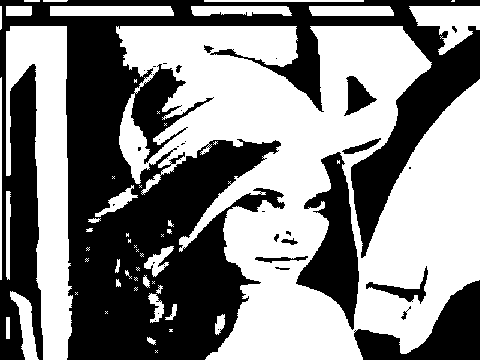

Closing


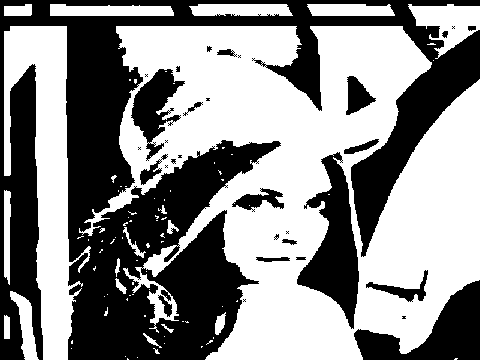

In [ ]:
kernel = np.array(
         [[255,0,255],
          [0,255,0],
          [255,0,255]]
)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))

#####3x3 Horizontal Kernel

Erosion


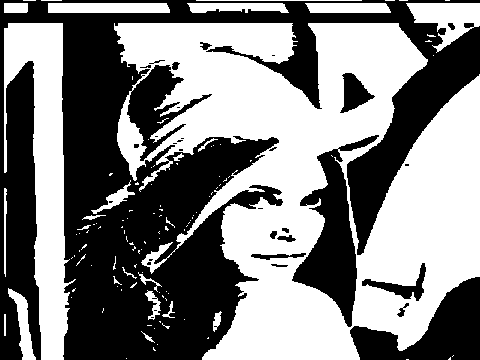

Dilatation


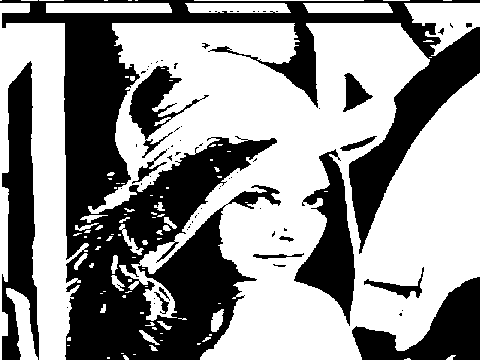

Opening


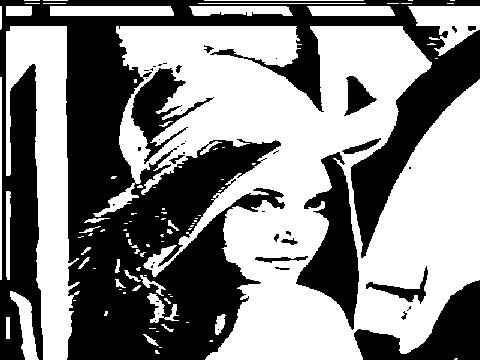

Closing


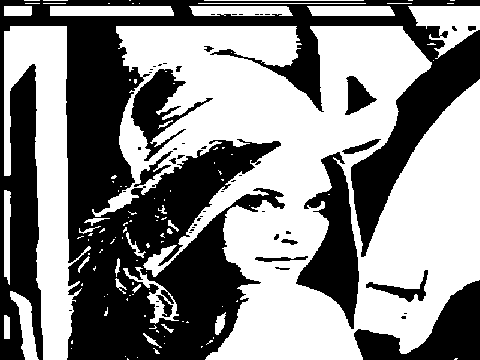

In [ ]:
kernel = np.array(
         [[0,0,0],
          [255,255,255],
          [0,0,0]]
)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))

#####3x3 Vertical Kernel

Erosion


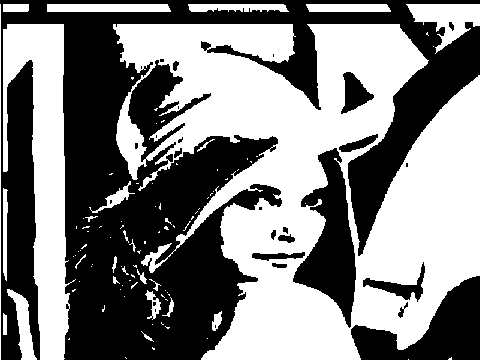

Dilatation


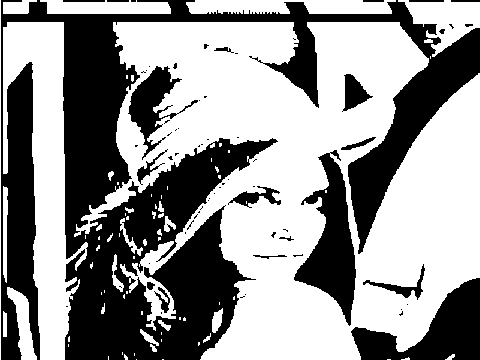

Opening


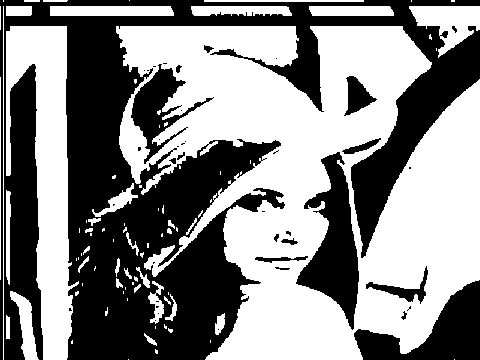

Closing


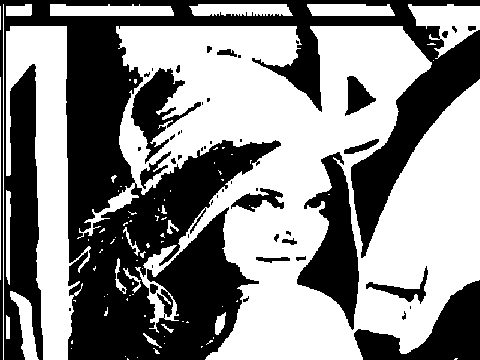

In [ ]:
kernel = np.array(
         [[0,255,0],
          [0,255,0],
          [0,255,0]]
)

print('Erosion')
cv2_imshow(erosion(imgOtsu, kernel))

print('Dilatation')
cv2_imshow(dilation(imgOtsu, kernel))

print('Opening')
cv2_imshow(opening(imgOtsu, kernel))

print('Closing')
cv2_imshow(closing(imgOtsu, kernel))